In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y = make_moons(n_samples=400,noise=.25,random_state=42)

(400, 2)

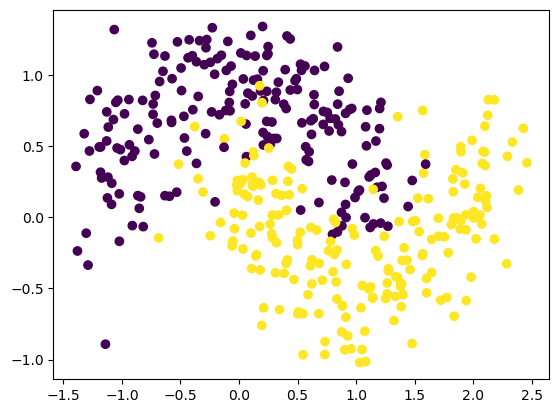

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)
X.shape

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=43)

In [8]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
adam = Adam(learning_rate=.01)

In [10]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=True)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7123 - loss: 0.5014 - val_accuracy: 0.8000 - val_loss: 0.5221
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3214 - val_accuracy: 0.8125 - val_loss: 0.3916
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9094 - loss: 0.2460 - val_accuracy: 0.8250 - val_loss: 0.3596
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8846 - loss: 0.2700 - val_accuracy: 0.8250 - val_loss: 0.3503
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.2129 - val_accuracy: 0.8500 - val_loss: 0.3136
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9118 - loss: 0.2156 - val_accuracy: 0.8750 - val_loss: 0.2750
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.1938 - val_accuracy: 0.8750 - val_loss: 0.2821
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.1518 - val_accuracy: 0.

In [14]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 206us/step


<Axes: >

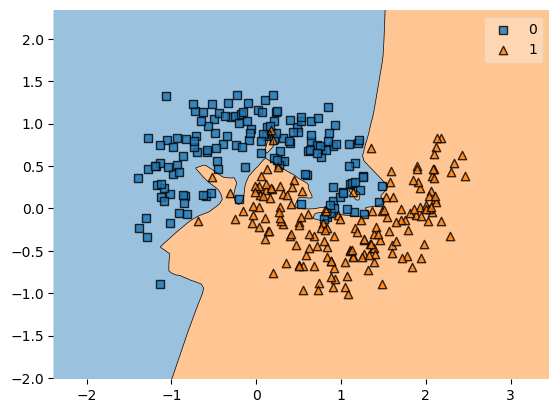

In [15]:
plot_decision_regions(X_train,y_train,clf=model)

In [29]:
model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim = 2,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
adam2 = Adam(learning_rate=.01)

In [31]:
model2.compile(loss='binary_crossentropy',optimizer=adam2,metrics=['accuracy'])

In [32]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=True)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7641 - loss: 0.6077 - val_accuracy: 0.7875 - val_loss: 0.5156
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8342 - loss: 0.4185 - val_accuracy: 0.7875 - val_loss: 0.4616
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.4002 - val_accuracy: 0.8000 - val_loss: 0.5072
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3590 - val_accuracy: 0.8125 - val_loss: 0.4307
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3415 - val_accuracy: 0.8250 - val_loss: 0.4221
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: 0.2792 - val_accuracy: 0.8250 - val_loss: 0.3954
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8845 - loss: 0.3081 - val_accuracy: 0.8375 - val_loss: 0.3766
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.2508 - val_accuracy: 0.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 200us/step


<Axes: >

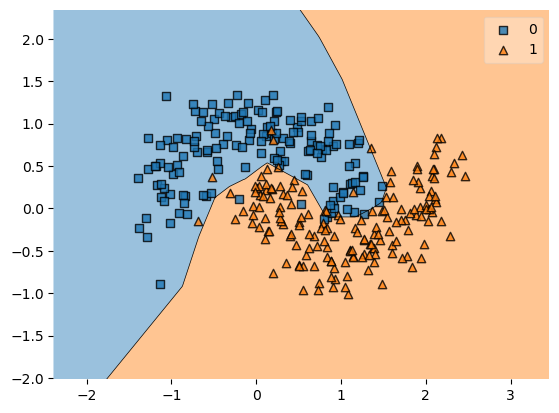

In [33]:
plot_decision_regions(X_train,y_train,clf=model2)